OR 게이트 구현해보기

0,0 -> 0

1,0 -> 1

0,1 -> 1

1,1 -> 1

데이터 준비하기

In [ ]:
import numpy as np

import tensorflow as tf
tf.random.set_seed(777)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse 

In [ ]:
# 데이터 준비하기
data = np.array([[0,0],[1,0],[0,1],[1,1]]) # OR 연산 학습 데이터
label = np.array([[0],[1],[1],[1]]) # 정답

모델 구성하기

In [ ]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='linear')) # 단층 퍼셉트론을 구성

모델 설정하기

In [ ]:
model.compile(optimizer= SGD(), loss=mse, metrics=['acc']) #mse= mean square error 

In [ ]:
#모델 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


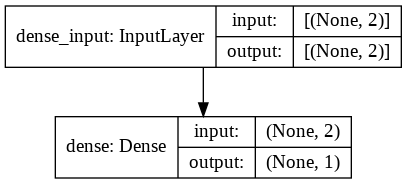

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 학습시키기

In [ ]:
history = model.fit(data, label, epochs=200) # 학습데이터, 정답, 공부 횟수

Epoch 1/200
1/1 [==============================] - 0s 297ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/200
1/1 [==============================] - 0s 5ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/200
1/1 [==============================] - 0s 7ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/200
1/1 [==============================] - 0s 4ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/200
1/1 [==============================] - 0s 6ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/200
1/1 [==============================] - 0s 3ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/200
1/1 [==============================] - 0s 5ms/step - loss: 0.900

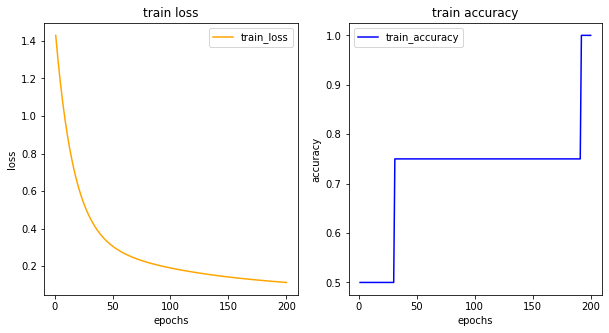

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

#train loss 손실값이 아래 바닥을 찍고 평형에 도달해야 끝나는거다. 만약 평형이 되지 않았다면, 더 돌려야 된다는 뜻이다.

모델 가중치 확인

In [ ]:
model.get_weights()

[array([[0.5995085 ],
        [0.06513146]], dtype=float32), array([0.4472612], dtype=float32)]

모델 예측하기

In [ ]:
result = model.predict(data)
print(result)

[[0.4472612 ]
 [1.0467697 ]
 [0.51239264]
 [1.1119012 ]]


In [ ]:
result = model.predict_classes(data)
print(result)

[[0]
 [1]
 [1]
 [1]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
